# <center>**IROS**<center>

**Libraries**

In [1]:
import numpy as np
import dummymoon as dm
#from scipy.signal import correlate

np.set_printoptions(precision=2, suppress=False)

In [2]:
#import importlib
#importlib.reload(dm)

**Loading Mask**

### Camera Parameters
mask_minx: -130.0
mask_miny: -130.0
mask_maxx: 130.0
mask_maxy: 130.0
mask_deltax: 0.25
mask_deltay: 0.4
mask_thickness: 0.15
slit_deltax: 0.25
slit_deltay: 14.0
detector_minx: -78.988
detector_maxx: 78.988
detector_miny: -76.5255
detector_maxy: 76.5255
mask_detector_distance: 202.9
open_fraction: 0.2157988165680473
real_open_fraction: 0.25048076923076923

### Shapes
Mask shape: (650, 1040)
Detector shape: (384, 632)
Sky shape: (1033, 1671)


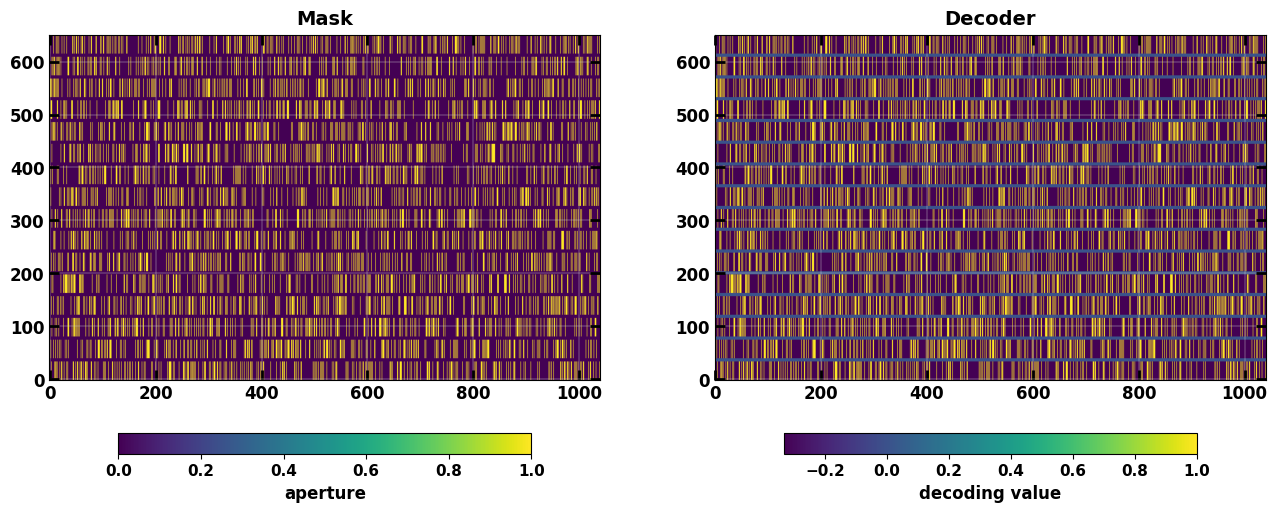

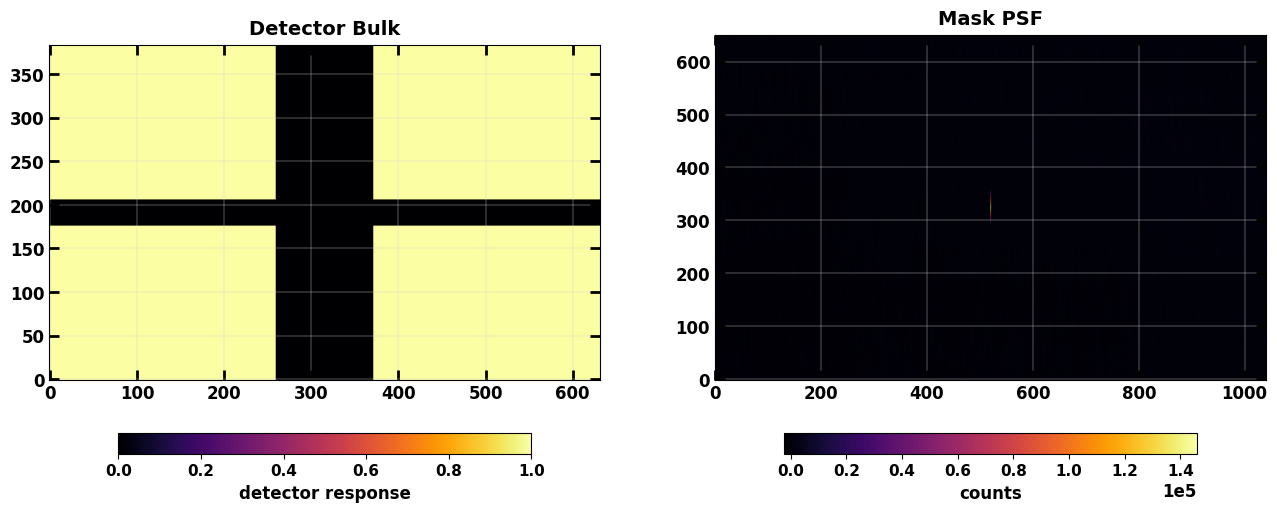

In [3]:
fits_path = "../Images_fits/wfm_mask.fits"
wfm = dm.import_mask(fits_path, True, True)

## **Basic IROS**

**Simulating Sky**

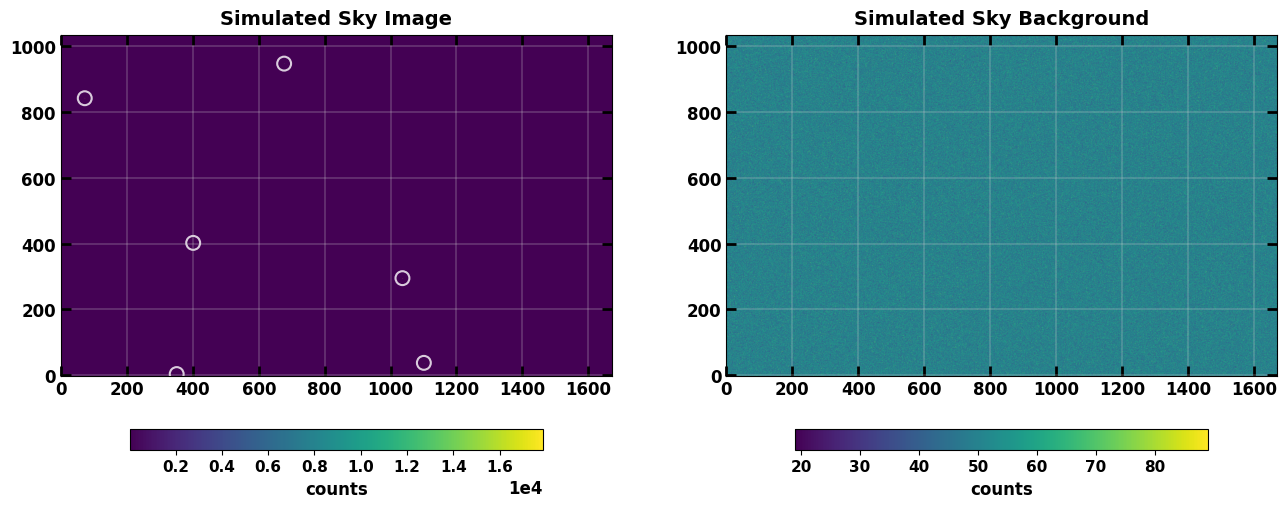

In [4]:
n_sources = 6
sources_flux = np.random.randint(int(5e3), int(2e4), size=n_sources)
sources_pos = None
sky_background_rate = int(5e1)

sky_image, sky_background, sources_pos = dm.sky_image_simulation(wfm.sky_shape, sources_flux, sources_pos, sky_background_rate)

dm.image_plot([sky_image, sky_background],
              ["Simulated Sky Image", "Simulated Sky Background"],
              cbarlabel=["counts", "counts"],
              cbarcmap=["viridis"]*2,
              simulated_sources=[sources_pos, None])


transmit = False
transmitted_photons = dm.transmitted_sky_image(sky_image, wfm) if transmit else sky_image

if transmit:
    dm.image_plot([transmitted_photons, dm.transmitted_sky_image(sky_background, wfm)],
                  ["Transmitted SkyImg", "Transmitted Sky BG"],
                  cbarlabel=["counts", "counts"],
                  cbarcmap=["viridis"]*2,
                  simulated_sources=[sources_pos, None])

show_sky = False
if show_sky:
    idx = 2
    crp = 50
    dm.image_plot([dm.crop(sky_image, sources_pos[idx], (crp, crp)), dm.crop(sky_background, sources_pos[idx], (crp, crp))],
                  [f"Cropped Source {idx}", f"Cropped Source {idx} - Sky BG"],
                  cbarlabel=["counts", "counts"],
                  cbarcmap=["viridis"]*2)

**Sky Encoding and Sky Reconstruction**

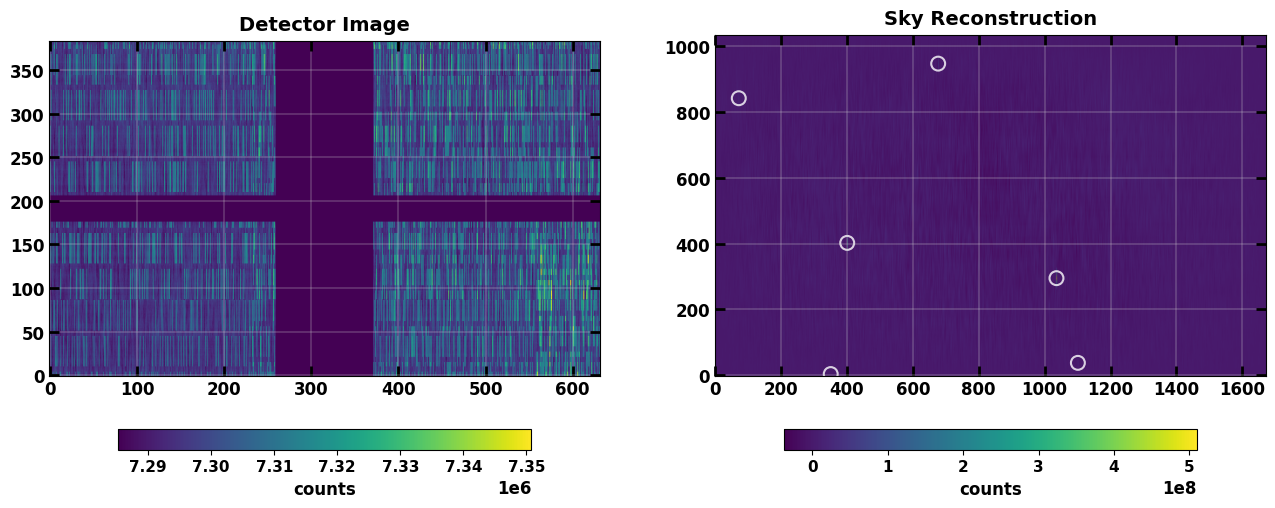

Simulated Source [0] transmitted counts: 7299 +/- 85
Reconstructed Source [0] counts: 73 +/- 1
Source [0] reconstructed counts wrt simulated: 0.99%

Simulated Source [1] transmitted counts: 13999 +/- 118
Reconstructed Source [1] counts: 7915 +/- 12
Source [1] reconstructed counts wrt simulated: 56.54%

Simulated Source [2] transmitted counts: 17416 +/- 132
Reconstructed Source [2] counts: 12832 +/- 14
Source [2] reconstructed counts wrt simulated: 73.68%

Simulated Source [3] transmitted counts: 10097 +/- 100
Reconstructed Source [3] counts: 831 +/- 5
Source [3] reconstructed counts wrt simulated: 8.23%

Simulated Source [4] transmitted counts: 17861 +/- 134
Reconstructed Source [4] counts: 1459 +/- 4
Source [4] reconstructed counts wrt simulated: 8.17%

Simulated Source [5] transmitted counts: 12625 +/- 112
Reconstructed Source [5] counts: 2891 +/- 8
Source [5] reconstructed counts wrt simulated: 22.90%



In [5]:
detector = dm.sky_encoding(transmitted_photons, wfm)

skyrec, skyvar = dm.sky_reconstruction(detector, wfm)
norm_skyrec, norm_skyvar = dm.skyrec_norm(skyrec, skyvar, wfm)


dm.image_plot([detector, skyrec],
              ["Detector Image", "Sky Reconstruction"],
              cbarlabel=["counts", "counts"],
              cbarlimits=[(np.unique(detector)[1], None), (None, None)],
              cbarscinot=[True]*2,
              cbarcmap=["viridis"]*2,
              simulated_sources=[None, sources_pos])

dm.print_skyrec_info(transmitted_photons, norm_skyrec, norm_skyvar, sources_pos, False)

show_cropped_rec = False
if show_cropped_rec:
    idx = 0
    crp = 50
    dm.image_plot([dm.crop(skyrec, sources_pos[idx], (crp, crp)), dm.crop(wfm.balancing, sources_pos[idx], (crp, crp))],
                    [f"Cropped Reconstr. Source {idx}", f"Cropped Source {idx} - Balancing"],
                    cbarlabel=["counts", "counts"],
                    cbarcmap=["viridis"]*2)

show_slices = False
if show_slices:
    dm.enhance_skyrec_slices(skyrec, sources_pos)

SNR Source [0] value: 49
SNR Source [1] value: 673
SNR Source [2] value: 950
SNR Source [3] value: 170
SNR Source [4] value: 336
SNR Source [5] value: 377


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_41775/1149475335.py:6: SyntaxWarning: invalid escape sequence '\s'
  cbarlabel=["counts", "SNR[$\sigma$]"],


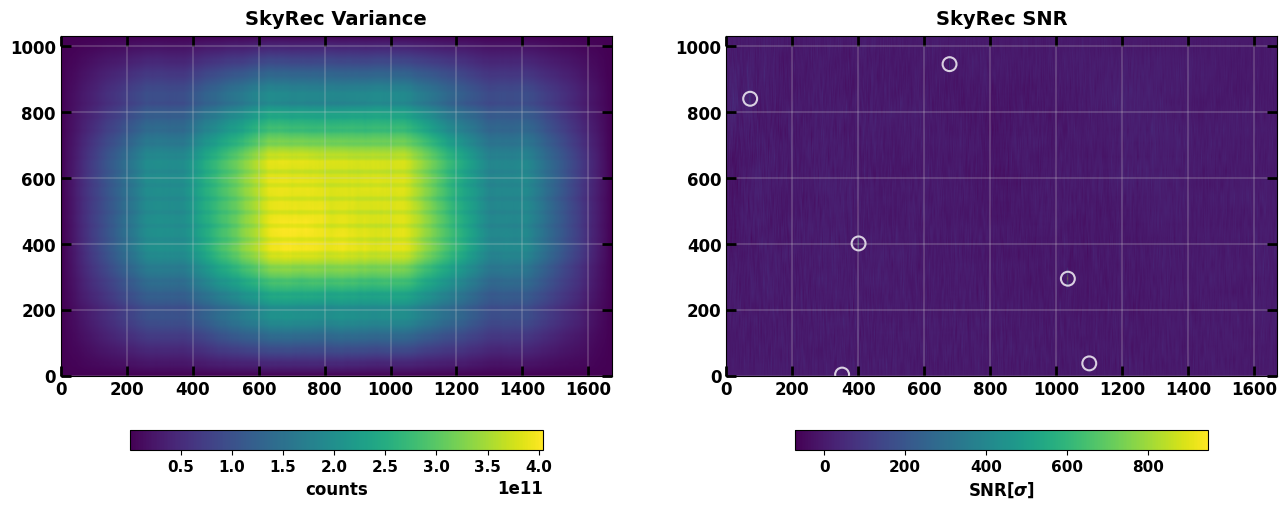

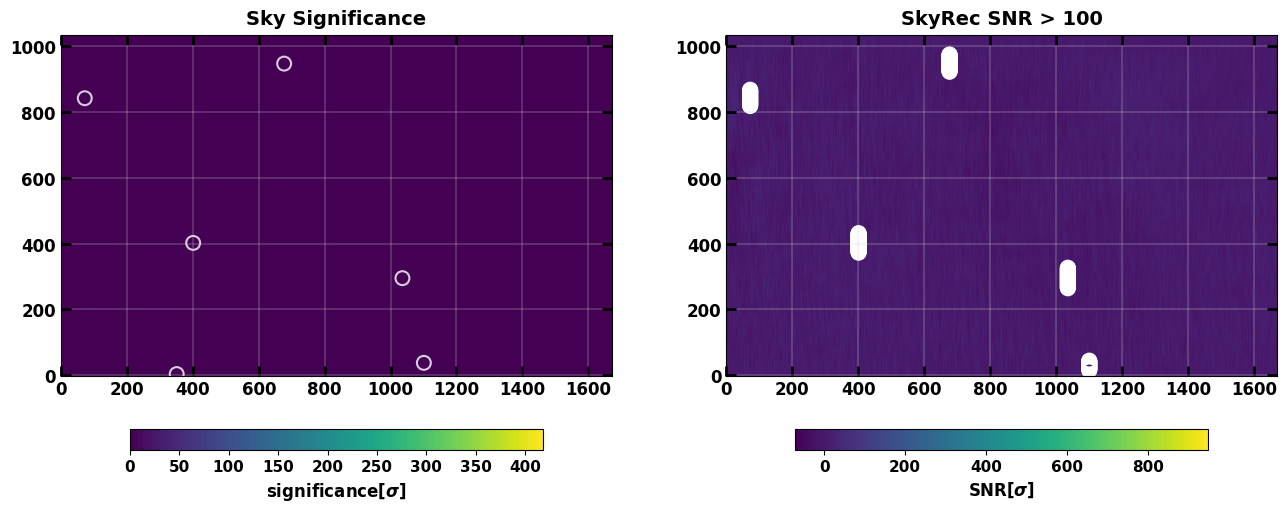

In [6]:
skysnr = dm.sky_snr(skyrec, skyvar)
dm.skyrec.print_snr_info(sky_image, skysnr, sources_pos, False)

dm.image_plot([skyvar, skysnr],
              ["SkyRec Variance", "SkyRec SNR"],
              cbarlabel=["counts", "SNR[$\sigma$]"],
              cbarlimits=[(None, None), (None, None)],
              cbarscinot=[True]*2,
              cbarcmap=["viridis"]*2,
              simulated_sources=[None, sources_pos])

thres_snr = 100
if thres_snr:
    sky_signif = dm.sky_significance(sky_image, sky_background_rate)
    dm.sky_snr_peaks(skysnr, thres_snr, sky_signif, sources_pos)

show_snr_distr = False
if show_snr_distr: dm.show_snr_distr(skysnr)

<br>

**Let's apply IROS...**

New source found at pos (295, 1036)!
Outliers with SNR(σ) over 50 at iter 1: 2273


<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_41775/3861581054.py:28: SyntaxWarning: invalid escape sequence '\s'
  cbarlabel=["counts", "SNR[$\sigma$]"],


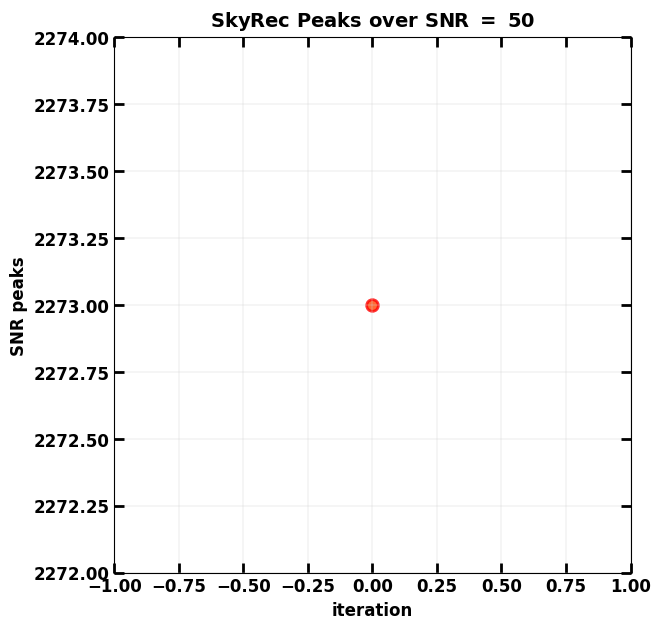

New source found at pos (402, 401)!
Outliers with SNR(σ) over 50 at iter 2: 1042
Source pos (402, 401) already recorded...
Outliers with SNR(σ) over 50 at iter 3: 656
Source pos (295, 1036) already recorded...
Outliers with SNR(σ) over 50 at iter 4: 571
New source found at pos (946, 677)!
Outliers with SNR(σ) over 50 at iter 5: 553
Source pos (946, 677) already recorded...
Outliers with SNR(σ) over 50 at iter 6: 464
Source pos (946, 677) already recorded...
Outliers with SNR(σ) over 50 at iter 7: 422
Source pos (402, 401) already recorded...
Outliers with SNR(σ) over 50 at iter 8: 396
New source found at pos (841, 72)!
Outliers with SNR(σ) over 50 at iter 9: 335
Source pos (841, 72) already recorded...
Outliers with SNR(σ) over 50 at iter 10: 274


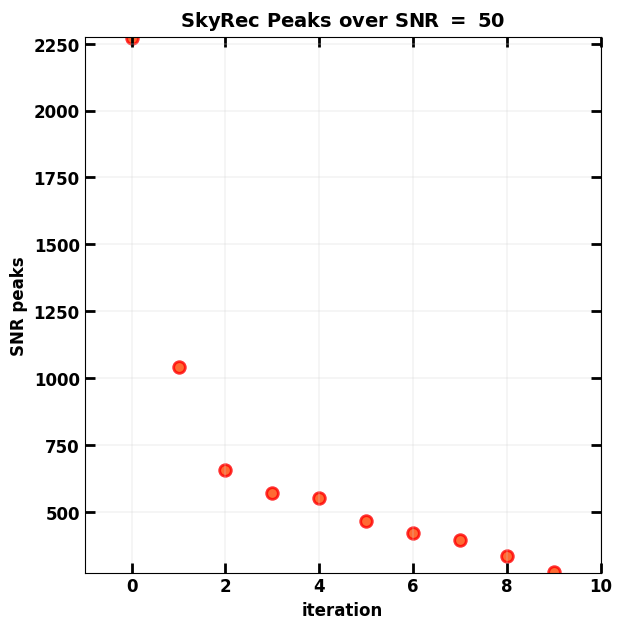

Source pos (946, 677) already recorded...
Outliers with SNR(σ) over 50 at iter 11: 227
Source pos (841, 72) already recorded...
Outliers with SNR(σ) over 50 at iter 12: 220
Source pos (841, 72) already recorded...
Outliers with SNR(σ) over 50 at iter 13: 204
Source pos (841, 72) already recorded...
Outliers with SNR(σ) over 50 at iter 14: 193
Source pos (946, 677) already recorded...
Outliers with SNR(σ) over 50 at iter 15: 185
Source pos (841, 72) already recorded...
Outliers with SNR(σ) over 50 at iter 16: 172
New source found at pos (38, 1101)!
Outliers with SNR(σ) over 50 at iter 17: 168
Source pos (841, 72) already recorded...
Outliers with SNR(σ) over 50 at iter 18: 165
Source pos (38, 1101) already recorded...
Outliers with SNR(σ) over 50 at iter 19: 162


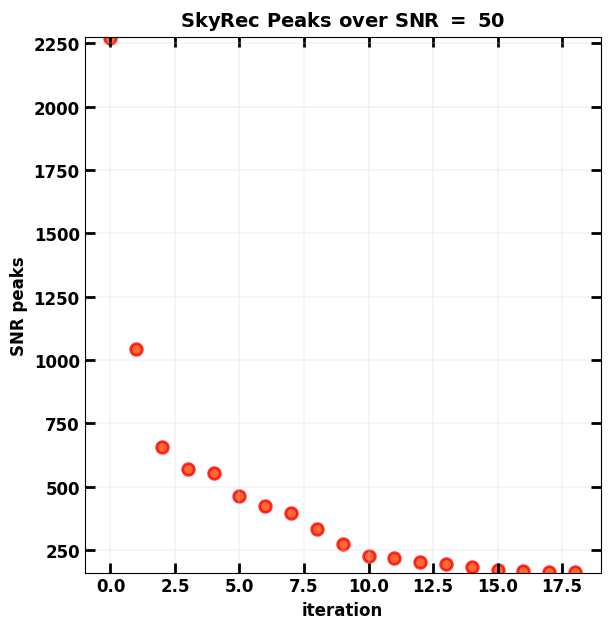

Source pos (295, 1036) already recorded...
Outliers with SNR(σ) over 50 at iter 20: 161
Source pos (841, 72) already recorded...
Outliers with SNR(σ) over 50 at iter 21: 149
Source pos (946, 677) already recorded...
Outliers with SNR(σ) over 50 at iter 22: 147
Source pos (38, 1101) already recorded...
Outliers with SNR(σ) over 50 at iter 23: 133
Source pos (841, 72) already recorded...
Outliers with SNR(σ) over 50 at iter 24: 130
Source pos (841, 72) already recorded...
Outliers with SNR(σ) over 50 at iter 25: 129


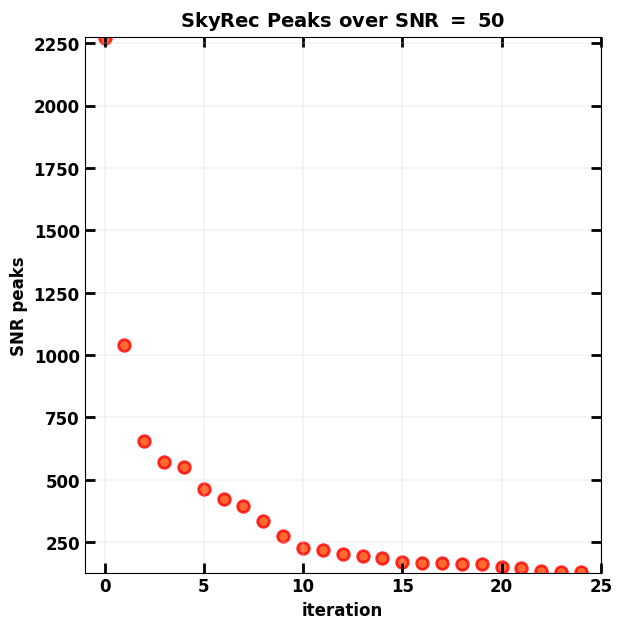

In [7]:
thres = 50
perform = True

if perform:

    data = dm.LoadData(detector, norm_skyrec, norm_skyvar, skysnr)

    loop = dm.IROS(
        n_iterations=25,
        data=data,
        snr_threshold=thres,
        cam=wfm,
        snr_distr=(False, 5),
        snr_peaks=(True, 9),
    )

    show_cropping = False
    show_results = False

    for idx, obj in enumerate(loop):
        sky, var, snr, sources = obj

        if show_cropping:
            k = 0
            print(f"Max SNR source pos: {sources['sources_pos'][k]}")
            dm.image_plot([dm.crop(sky, sources['sources_pos'][k], (30, 30)), dm.crop(snr, sources['sources_pos'][k], (30, 30))],
                        [f"Max SNR $S_{{{k}}}$ Reconstr.", f"Max SNR $S_{{{k}}}$ Value, iter. {idx}"],
                        cbarlabel=["counts", "SNR[$\sigma$]"],
                        cbarcmap=['viridis']*2)

        if show_results:
            dm.image_plot([skyrec, sky],
                            ["Sky Reconstruction", f"SkyRec IROS, iter. {idx}"],
                            cbarlabel=["counts", "counts"],
                            cbarcmap=['viridis']*2,
                            simulated_sources=[sources_pos]*2)

            dm.image_plot([snr, skyrec - sky],
                            [f"IROS iter. {idx} SNR", f"Residues: SkyRec - IROS{idx}"],
                            cbarlabel=["counts", "counts"],
                            cbarcmap=['viridis']*2,
                            simulated_sources=[sources_pos]*2)

#### IROS Sky Reconstruction Run ####
 - simulated sources: 6
 - IROS rec. sources: 5 :c

Source [0] Reconstruction:
 - simulated source transmitted counts: 17416 +/- 132

 - rec. source counts: 12832 +/- 14
 - rec. source SNR: 950
 - source rec. counts wrt simulated: 73.68%

 - IROS rec. source counts: 12832 +/- 14
 - IROS rec. source SNR: 950
 - source rec. counts wrt simulated (with IROS): 73.68%

Source [1] Reconstruction:
 - simulated source transmitted counts: 13999 +/- 118

 - rec. source counts: 7915 +/- 12
 - rec. source SNR: 673
 - source rec. counts wrt simulated: 56.54%

 - IROS rec. source counts: 7818 +/- 12
 - IROS rec. source SNR: 664
 - source rec. counts wrt simulated (with IROS): 55.85%

Source [2] Reconstruction:
 - simulated source transmitted counts: 12625 +/- 112

 - rec. source counts: 2891 +/- 8
 - rec. source SNR: 377
 - source rec. counts wrt simulated: 22.90%

 - IROS rec. source counts: 2931 +/- 8
 - IROS rec. source SNR: 382
 - source rec. counts wrt simul

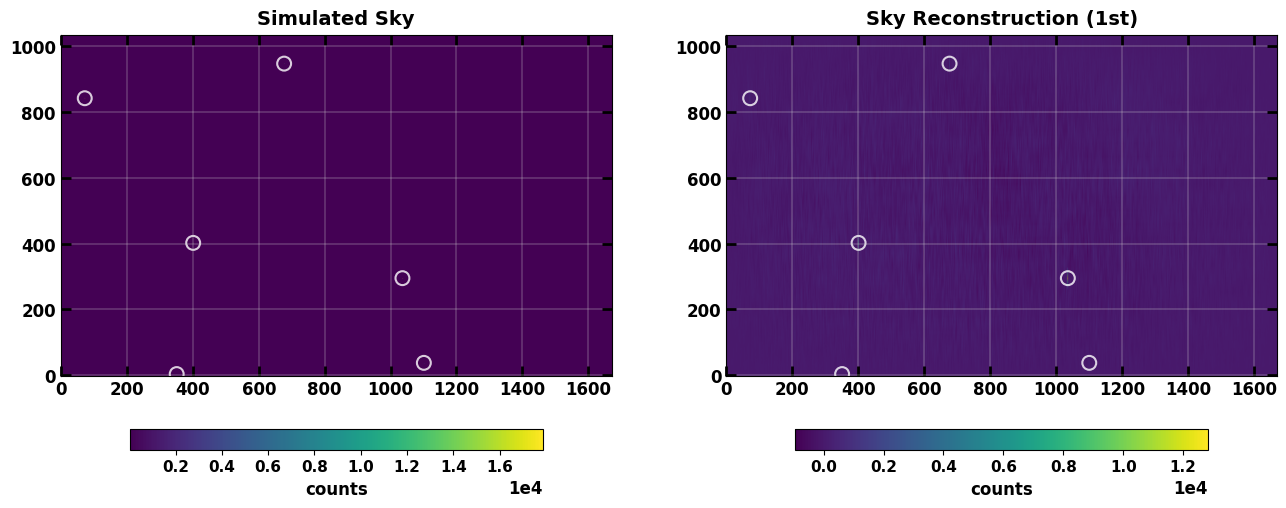

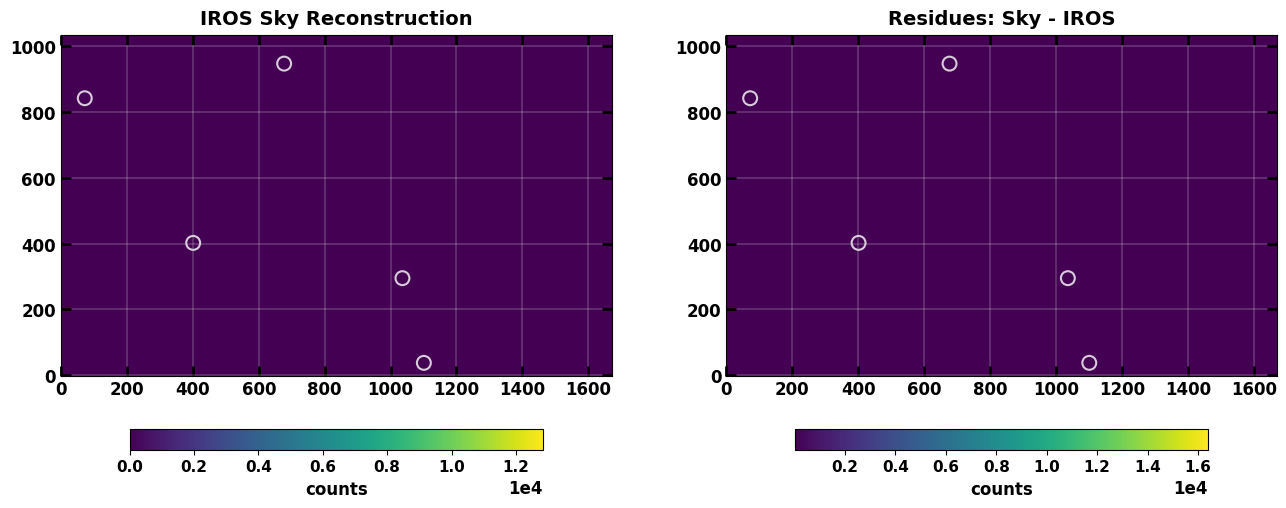

In [8]:
iros_sky, residues = dm.iros_skyrec(sky_image, sources_pos, sources, data, wfm)

In [9]:
dm.iros_log(sources)

#### IROS Sky Reconstruction Log ####

Source [0] Log:
 - pos: (295, 1036)
 - counts: 12832
 - std: 14
 - SNR: 949.75

Source [1] Log:
 - pos: (402, 401)
 - counts: 7818
 - std: 12
 - SNR: 664.40

Source [2] Log:
 - pos: (946, 677)
 - counts: 2931
 - std: 8
 - SNR: 382.08

Source [3] Log:
 - pos: (841, 72)
 - counts: 1462
 - std: 4
 - SNR: 337.27

Source [4] Log:
 - pos: (38, 1101)
 - counts: 930
 - std: 5
 - SNR: 190.48

#### End IROS Sky Reconstruction Log ####
